In [1]:
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
from shutil import copy
from collections import defaultdict

# Function to categorize the files and move them into folders
def categorize_and_copy_files(file_paths):
    categories = defaultdict(list)

    for file_path in file_paths:
        # Extracting the filename from the path
        file_name = os.path.basename(file_path)

        # Checking for keywords to categorize files
        if "root_mask" in file_name and "occluded" not in file_name:
            categories['roots'].append(file_path)
        elif "shoot_mask" in file_name:
            categories['shoots'].append(file_path)
        elif "seed_mask" in file_name:
            categories['seeds'].append(file_path)
        elif "occluded_root_mask" in file_name:
            categories['occluded_roots'].append(file_path)

    # Create a parent directory for all categories
    parent_folder = os.path.join(os.getcwd(), "splited_masks")
    if not os.path.exists(parent_folder):
        os.makedirs(parent_folder)

    # Create folders for each category and copy files into them
    for category in categories:
        folder_path = os.path.join(parent_folder, category)
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)

        # Copy files to respective folders
        for file in categories[category]:
            copy(file, os.path.join(folder_path, os.path.basename(file)))

# Your list of file paths
folder_path = r"C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\Masks"

# List all file paths in the folder
file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path)]

# Categorize the files and copy them into folders
categorize_and_copy_files(file_paths)


In [3]:
import os
import random
import shutil

def split_images_into_train_val(image_folder, mask_folder, output_folder, train_ratio=0.8):
    # Create train and validation directories inside the output folder
    train_dir = os.path.join(output_folder, 'train_images', 'train')
    val_dir = os.path.join(output_folder, 'val_images', 'val')
    train_masks_dir = os.path.join(output_folder, 'train_masks', 'train')
    val_masks_dir = os.path.join(output_folder, 'val_masks', 'val')

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(train_masks_dir, exist_ok=True)
    os.makedirs(val_masks_dir, exist_ok=True)

    # Get the list of image and mask files
    images = os.listdir(image_folder)
    masks = os.listdir(mask_folder)

    # Shuffle images and masks together
    combined = list(zip(images, masks))
    random.shuffle(combined)
    images[:], masks[:] = zip(*combined)

    # Split into training and validation sets
    num_train = int(len(images) * train_ratio)

    train_images = images[:num_train]
    val_images = images[num_train:]
    train_masks = masks[:num_train]
    val_masks = masks[num_train:]

    # Move images and masks to their respective directories inside train and val folders
    for image in train_images:
        shutil.copy(os.path.join(image_folder, image), os.path.join(train_dir, image))
    for mask in train_masks:
        shutil.copy(os.path.join(mask_folder, mask), os.path.join(train_masks_dir, mask))
    for image in val_images:
        shutil.copy(os.path.join(image_folder, image), os.path.join(val_dir, image))
    for mask in val_masks:
        shutil.copy(os.path.join(mask_folder, mask), os.path.join(val_masks_dir, mask))

# Usage example:
images_directory = r"C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\Images\train"
masks_directory = r"C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\splited_masks\roots"
output_directory = r"C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\Images for model\roots"

split_images_into_train_val(images_directory, masks_directory, output_directory)





In [4]:
# to png format

# import os
# from PIL import Image

# folder_path = r"C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\Images for model\roots\train_masks\train"

# # Iterate through files in the directory
# for filename in os.listdir(folder_path):
#     if filename.endswith('.tif'):  # Check if the file is a .tif file
#         # Open the image
#         image_path = os.path.join(folder_path, filename)
#         try:
#             img = Image.open(image_path)
            
#             # Convert and save as .png
#             new_filename = os.path.splitext(filename)[0] + '.png'
#             new_image_path = os.path.join(folder_path, new_filename)
#             img.save(new_image_path, 'PNG')  # Save as PNG format
            
#             img.close()  # Close the image file handle

#             # Remove the old .tif file
#             os.remove(image_path)
#         except Exception as e:
#             print(f"Error processing file: {image_path}. Error: {str(e)}")


(-0.5, 4201.5, 3005.5, -0.5)

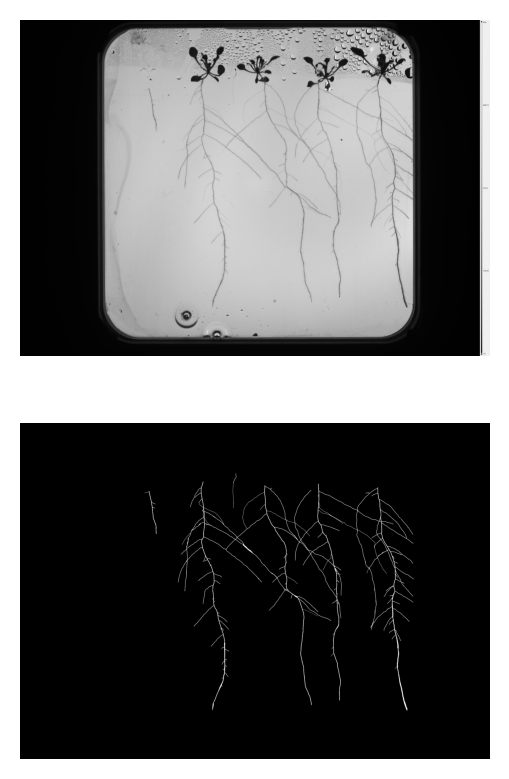

In [5]:
image_path = r'C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\Images for model\roots\train_images\train\001_43-18-ROOT1-2023-08-08_pvd_OD001_Col0_02-Fish Eye Corrected.png'
mask_path = r'C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\Images for model\roots\train_masks\train\001_43-18-ROOT1-2023-08-08_pvd_OD001_Col0_02-Fish Eye Corrected_root_mask.tif'

image = cv2.imread(image_path)
mask = cv2.imread(mask_path, 0)


fig, ax = plt.subplots(2, dpi=200)
ax[0].imshow(image)
ax[0].axis('off')
ax[1].imshow(mask, cmap='gray')
ax[1].axis('off')

In [6]:
# And some dataset info
print(f'Image shape: {image.shape}')
print(f'Mask shape: {mask.shape}')
print(f'Image data type: {image.dtype}')
print(f'Mask data type: {mask.dtype}')
print(f'Image pixel values: {np.min(image)}-{np.max(image)}')
print(f'Mask pixel values: {np.min(mask)}-{np.max(mask)}')

Image shape: (3006, 4202, 3)
Mask shape: (3006, 4202)
Image data type: uint8
Mask data type: uint8
Image pixel values: 0-255
Mask pixel values: 0-1


In [7]:
def padder(image, patch_size):
    """
    Adds padding to an image to make its dimensions divisible by a specified patch size.

    This function calculates the amount of padding needed for both the height and width of an image so that its dimensions become divisible by the given patch size. The padding is applied evenly to both sides of each dimension (top and bottom for height, left and right for width). If the padding amount is odd, one extra pixel is added to the bottom or right side. The padding color is set to black (0, 0, 0).

    Parameters:
    - image (numpy.ndarray): The input image as a NumPy array. Expected shape is (height, width, channels).
    - patch_size (int): The patch size to which the image dimensions should be divisible. It's applied to both height and width.

    Returns:
    - numpy.ndarray: The padded image as a NumPy array with the same number of channels as the input. Its dimensions are adjusted to be divisible by the specified patch size.

    Example:
    - padded_image = padder(cv2.imread('example.jpg'), 128)

    """

    h = image.shape[0]
    w = image.shape[1]
    height_padding = ((h // patch_size) + 1) * patch_size - h
    width_padding = ((w // patch_size) + 1) * patch_size - w

    top_padding = int(height_padding/2)
    bottom_padding = height_padding - top_padding

    left_padding = int(width_padding/2)
    right_padding = width_padding - left_padding

    padded_image = cv2.copyMakeBorder(image, top_padding, bottom_padding, left_padding, right_padding, cv2.BORDER_CONSTANT, value=[0, 0, 0])

    return padded_image

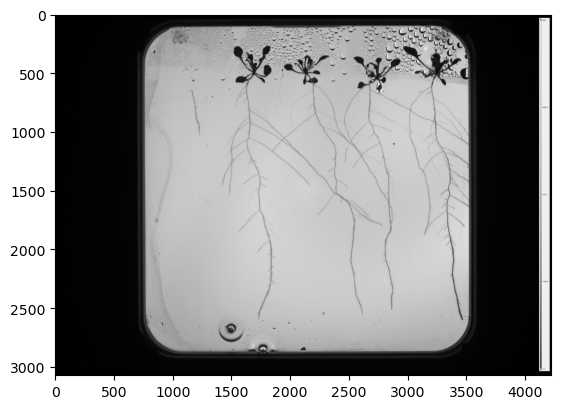

In [8]:
patch_size = 128
image = cv2.imread(image_path)
padded_image = padder(image, patch_size)
plt.imshow(padded_image)

In [9]:
padded_image.shape[0] % patch_size, padded_image.shape[1] % patch_size

(0, 0)

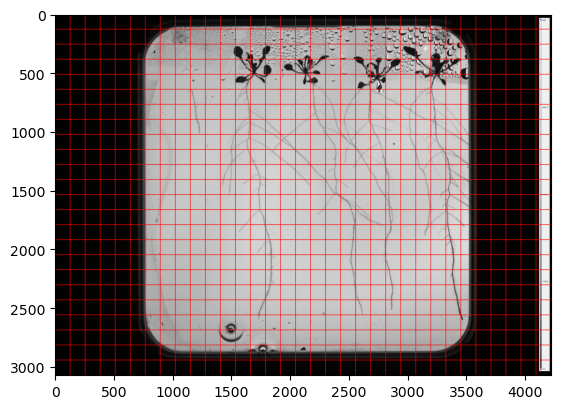

In [10]:
patch_size = 128

height, width = padded_image.shape[:2]

for x in range(0, width, patch_size):
    cv2.line(padded_image, (x, 0), (x, height), color=(255, 0, 0), thickness=3)

for y in range(0, height, patch_size):
    cv2.line(padded_image, (0, y), (width, y), color=(255, 0, 0), thickness=3)

plt.imshow(padded_image)

In [11]:
from patchify import patchify, unpatchify

In [12]:
patch_size = 128
image = cv2.imread(image_path)
image = padder(image, patch_size)
patches = patchify(image, (patch_size, patch_size, 3), step=patch_size)

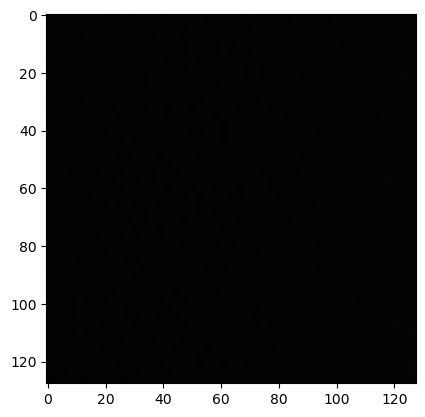

In [13]:
plt.imshow(patches[3, 4, 0])

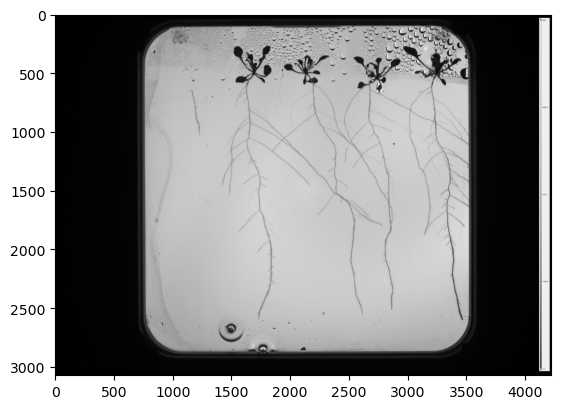

In [14]:
plt.imshow(unpatchify(patches, image.shape))

In [15]:
patches = patchify(image, (patch_size, patch_size, 3), step=64)
patches.shape

(47, 65, 1, 128, 128, 3)

In [16]:
import os

image_dir = r'C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\Images for model\roots\train_images\train'
mask_dir = r'C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\Images for model\roots\train_masks\train'

image_files = os.listdir(image_dir)
mask_files = os.listdir(mask_dir)

missing_masks = []

for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    corresponding_mask = image_file.replace('.png', '_root_mask.tif')
    mask_path = os.path.join(mask_dir, corresponding_mask)
    
    if corresponding_mask not in mask_files or not os.path.exists(mask_path):
        missing_masks.append(image_path)

# Delete images without corresponding masks
for missing_image in missing_masks:
    os.remove(missing_image)
    print(f"Deleted: {missing_image}")

# Print or handle missing mask files
if missing_masks:
    print("Images without corresponding masks:")
    for missing_image in missing_masks:
        print(missing_image)
else:
    print("All images have corresponding masks.")


Deleted: C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\Images for model\roots\train_images\train\000_43-18-ROOT1-2023-08-08_pvdCherry_OD001_Col0_01-Fish Eye Corrected.png
Deleted: C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\Images for model\roots\train_images\train\000_43-2-ROOT1-2023-08-08_pvd_OD0001_f6h1_02-Fish Eye Corrected.png
Deleted: C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\Images for model\roots\train_images\train\003_43-18-ROOT1-2023-08-08_pvdCherry_OD01_f6h1_01-Fish Eye Corrected.png
Deleted: C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\Images for model\roots\train_images\train\003_43-6-ROOT1-2023-08-08_pvd_OD0001_f6h1_03-Fish Eye Corrected.png
Deleted: C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. C

In [17]:
import os

image_dir = r'C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\Images for model\roots\val_images\val'
mask_dir = r'C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\Images for model\roots\val_masks\val'

image_files = os.listdir(image_dir)
mask_files = os.listdir(mask_dir)

missing_masks = []

for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    corresponding_mask = image_file.replace('.png', '_root_mask.tif')
    mask_path = os.path.join(mask_dir, corresponding_mask)
    
    if corresponding_mask not in mask_files or not os.path.exists(mask_path):
        missing_masks.append(image_path)

# Delete images without corresponding masks
for missing_image in missing_masks:
    os.remove(missing_image)
    print(f"Deleted: {missing_image}")

# Print or handle missing mask files
if missing_masks:
    print("Images without corresponding masks:")
    for missing_image in missing_masks:
        print(missing_image)
else:
    print("All images have corresponding masks.")

Deleted: C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\Images for model\roots\val_images\val\002_43-19-ROOT1-2023-08-08_pvd_OD001_Col0_01-Fish Eye Corrected.png
Deleted: C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\Images for model\roots\val_images\val\007_43-18-ROOT1-2023-08-08_pvdCherry_OD001_Col0_05-Fish Eye Corrected.png
Deleted: C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\Images for model\roots\val_images\val\011_43-18-ROOT1-2023-08-08_pvdCherry_OD001_Col0_02-Fish Eye Corrected.png
Deleted: C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\Images for model\roots\val_images\val\012_43-17-ROOT1-2023-08-08_pvdCherry_OD001_f6h1_04-Fish Eye Corrected.png
Deleted: C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer V

In [18]:
import glob
def dataset_generator(dataset_type, patch_size, scaling_factor):
    """
    Generates a dataset of image patches and corresponding mask patches for segmentation tasks.

    This function reads images and their corresponding masks from a specified directory,
    scales them based on the provided scaling factor, and then splits them into patches of
    the specified size. It returns two numpy arrays containing the patches of the images and
    their corresponding masks.

    Args:
    - dataset_type (str): The type of dataset to process ('train', 'test', etc.), used to 
      determine the subdirectory within the blood cell dataset from which to load images.
    - patch_size (int): The height and width of the square patches to be extracted from each 
      image and mask. Assumes the images and masks are square.
    - scaling_factor (float): A factor to scale the images and masks. If it's different from 1,
      the images and masks are resized accordingly. A scaling factor greater than 1 enlarges 
      the images/masks, while a factor less than 1 shrinks them.

    Returns:
    - X (numpy.ndarray): An array of image patches. Each patch is a numpy array of shape 
      (patch_size, patch_size, 3), representing the height, width, and color channels.
    - y (numpy.ndarray): An array of corresponding mask patches. Each mask patch is a numpy 
      array of shape (patch_size, patch_size, 1), representing the height, width, and a single 
      channel for the mask.

    Note:
    - The function expects a directory structure with separate subdirectories for images and 
      masks within each dataset type (e.g., 'blood_cell_dataset/train_images/train/').
    - It uses OpenCV for image processing and assumes the mask images are grayscale.
    - The returned image and mask patches are normalized by dividing by 255.
    """
    X = []
    y = []

    # YOUR CODE HERE    

    for image_path in glob.glob(f'Images for model/roots/{dataset_type}_images/{dataset_type}/*.png'):
        mask_path = image_path.replace('images', 'masks').replace('.png', '_root_mask.tif')
        
        image = cv2.imread(image_path)
        image = padder(image, patch_size)
        if scaling_factor !=1:
            image = cv2.resize(image,(0,0), fx = scaling_factor, fy = scaling_factor)
        patches = patchify(image, ( patch_size,patch_size,3),step=patch_size)
        patches = patches.reshape(-1,patch_size,patch_size,3)
        X.append(patches)

        mask = cv2.imread(mask_path,0)
        if mask is None:
         print(f"Error reading mask image at {mask_path}")
         # Handle the error, maybe skip this image or take alternative action
        else:
         mask = padder(mask, patch_size)
         if scaling_factor !=1:
            mask = cv2.resize(mask,(0,0), fx = scaling_factor, fy = scaling_factor)
         patches = patchify(mask, ( patch_size,patch_size),step=patch_size)
         patches = patches.reshape(-1,patch_size,patch_size,1)
         y.append(patches)
        

    X = np.array(X)
    y = np.array(y)
    X = X.reshape(-1,patch_size,patch_size,3)
    y = y.reshape(-1,patch_size,patch_size,1)
    X = X/255
    y = y/255
    
   
    return X, y

In [19]:
patch_size = 128
scaling_factor = 1

In [20]:
X_train, y_train = dataset_generator(dataset_type='train',
                                     patch_size=patch_size,
                                     scaling_factor=scaling_factor)
X_train.shape, y_train.shape

((47520, 128, 128, 3), (47520, 128, 128, 1))

In [21]:
X_val, y_val = dataset_generator(dataset_type='val',
                                 patch_size=patch_size,
                                 scaling_factor=scaling_factor)
X_val.shape, y_val.shape 

((15048, 128, 128, 3), (15048, 128, 128, 1))

In [22]:
mask_type = 'roots'
dataset_type = 'train'

for image_path in glob.glob(f'Images for model/{mask_type}/{dataset_type}_images/{dataset_type}/*.png'):
        mask_suffix = f'_{mask_type}_mask.tif'
        mask_path = image_path.replace('images', 'masks').replace('.png', mask_suffix)
        print(mask_path)

Images for model/roots/train_masks/train\001_43-18-ROOT1-2023-08-08_pvd_OD001_Col0_02-Fish Eye Corrected_roots_mask.tif
Images for model/roots/train_masks/train\001_43-6-ROOT1-2023-08-08_pvdCherry_OD001_Col0_04-Fish Eye Corrected_roots_mask.tif
Images for model/roots/train_masks/train\002_43-19-ROOT1-2023-08-08_pvd_OD001_Col0_01-Fish Eye Corrected_roots_mask.tif
Images for model/roots/train_masks/train\002_43-6-ROOT1-2023-08-08_pvd_OD001_Col0_01-Fish Eye Corrected_roots_mask.tif
Images for model/roots/train_masks/train\005_43-18-ROOT1-2023-08-08_pvd_OD001_Col0_05-Fish Eye Corrected_roots_mask.tif
Images for model/roots/train_masks/train\005_43-2-ROOT1-2023-08-08_control_pH7_-Fe+B_col0_04-Fish Eye Corrected_roots_mask.tif
Images for model/roots/train_masks/train\006_43-17-ROOT1-2023-08-08_mock_pH5_f6h1_02-Fish Eye Corrected_roots_mask.tif
Images for model/roots/train_masks/train\010_43-18-ROOT1-2023-08-08_pvd_OD001_f6h1_04-Fish Eye Corrected_roots_mask.tif
Images for model/roots/train_m

In [23]:
dataset_type='train'

for image_path in glob.glob(f'Images for model/roots/{dataset_type}_images/{dataset_type}/*.png'):
        mask_path = image_path.replace('images', 'masks').replace('.png', '_root_mask.tif')
        print(mask_path)

Images for model/roots/train_masks/train\001_43-18-ROOT1-2023-08-08_pvd_OD001_Col0_02-Fish Eye Corrected_root_mask.tif
Images for model/roots/train_masks/train\001_43-6-ROOT1-2023-08-08_pvdCherry_OD001_Col0_04-Fish Eye Corrected_root_mask.tif
Images for model/roots/train_masks/train\002_43-19-ROOT1-2023-08-08_pvd_OD001_Col0_01-Fish Eye Corrected_root_mask.tif
Images for model/roots/train_masks/train\002_43-6-ROOT1-2023-08-08_pvd_OD001_Col0_01-Fish Eye Corrected_root_mask.tif
Images for model/roots/train_masks/train\005_43-18-ROOT1-2023-08-08_pvd_OD001_Col0_05-Fish Eye Corrected_root_mask.tif
Images for model/roots/train_masks/train\005_43-2-ROOT1-2023-08-08_control_pH7_-Fe+B_col0_04-Fish Eye Corrected_root_mask.tif
Images for model/roots/train_masks/train\006_43-17-ROOT1-2023-08-08_mock_pH5_f6h1_02-Fish Eye Corrected_root_mask.tif
Images for model/roots/train_masks/train\010_43-18-ROOT1-2023-08-08_pvd_OD001_f6h1_04-Fish Eye Corrected_root_mask.tif
Images for model/roots/train_masks/tra

In [24]:
import tensorflow as tf
import keras.backend as K

In [25]:
# Let's implement two custom metrics f1 score and iou
def f1(y_true, y_pred):
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = TP / (Positives+K.epsilon())
        return recall
    
    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = TP / (Pred_Positives+K.epsilon())
        return precision
    
    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def iou(y_true, y_pred):
    def f(y_true, y_pred):
        intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
        total = K.sum(K.square(y_true),[1,2,3]) + K.sum(K.square(y_pred),[1,2,3])
        union = total - intersection
        return (intersection + K.epsilon()) / (union + K.epsilon())
    return K.mean(f(y_true, y_pred), axis=-1)

In [26]:
# U-Net model
# Author: Sreenivas Bhattiprolu
# This code is coming from the videos at the beginning
from keras.models import Model
import keras.backend as K
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda

def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
# Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = inputs

    # Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    # Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1, iou])
    model.summary()
    
    return model

In [27]:
model = simple_unet_model(patch_size, patch_size, 3)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 128, 128, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [28]:
# from keras.callbacks import EarlyStopping

# cb = EarlyStopping(monitor= "val_loss",
#                    patience = 2,
#                    restore_best_weights = "True",
#                    mode="min")

# history = model.fit(X_train, y_train, batch_size=8, verbose=1, epochs=100, validation_data=(X_val, y_val), callbacks=(cb))

In [29]:
# Create a new directory for patches
# Folder name will be blood_cell_dataset_patched instead of blood_cell_dataset
import os
patch_dir = 'Images for model/roots_patched'
for subdir in ['train_images/train', 'train_masks/train', 'val_images/val', 'val_masks/val']:
    os.makedirs(os.path.join(patch_dir, subdir), exist_ok=True)

In [30]:
def create_and_save_patches(dataset_type, patch_size, scaling_factor):
    """
    Splits images and their corresponding masks from a blood cell dataset into smaller patches and saves them.

    This function takes images and masks from a specified dataset type, scales them if needed, and then splits them into smaller patches. Each patch is saved as a separate file. This is useful for preparing data for tasks like image segmentation in machine learning.

    Parameters:
    - dataset_type (str): The type of the dataset to process (e.g., 'train', 'test'). It expects a directory structure like 'blood_cell_dataset/{dataset_type}_images/{dataset_type}' for images and 'blood_cell_dataset/{dataset_type}_masks/{dataset_type}' for masks.
    - patch_size (int): The size of the patches to be created. Patches will be squares of size patch_size x patch_size.
    - scaling_factor (float): The factor by which the images and masks should be scaled. A value of 1 means no scaling.

    Returns:
    None. The function saves the patches as .png files in directories based on their original paths, but replacing 'blood_cell_dataset' with 'blood_cell_dataset_patched'.

    Note:
    - The function assumes a specific directory structure and naming convention for the dataset.
    """
    for image_path in glob.glob(f'Images for model/roots/{dataset_type}_images/{dataset_type}/*.png'):
        mask_path = image_path.replace('images', 'masks').replace('.png', '_root_mask.tif')

        image = cv2.imread(image_path)
        image = padder(image, patch_size)
        if scaling_factor != 1:
            image = cv2.resize(image, (0,0), fx=scaling_factor, fy=scaling_factor)
        patches = patchify(image, (patch_size, patch_size, 3), step=patch_size)
        patches = patches.reshape(-1, patch_size, patch_size, 3)

        image_patch_path = image_path.replace('Images for model/roots', patch_dir)
        for i, patch in enumerate(patches):
            image_patch_path_numbered = f'{image_patch_path[:-4]}_{i}.png'
            cv2.imwrite(image_patch_path_numbered, patch)

        mask_path = image_path.replace('images', 'masks').replace('.png', '_root_mask.tif')
        mask = cv2.imread(mask_path, 0)
        mask = padder(mask, patch_size)
        if scaling_factor != 1:
            mask = cv2.resize(mask, (0,0), fx=scaling_factor, fy=scaling_factor)
        patches = patchify(mask, (patch_size, patch_size), step=patch_size)
        patches = patches.reshape(-1, patch_size, patch_size, 1)

        mask_patch_path = mask_path.replace('Images for model/roots', patch_dir)
        for i, patch in enumerate(patches):
            mask_patch_path_numbered = f'{mask_patch_path[:-4]}_{i}.png'
            cv2.imwrite(mask_patch_path_numbered, patch)

In [31]:
patch_size = 128
scaling_factor = 1

In [32]:
create_and_save_patches('train', patch_size, scaling_factor)

In [33]:
create_and_save_patches('val', patch_size, scaling_factor)

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
# Training images
train_image_datagen = ImageDataGenerator(rescale=1./255)

train_image_generator = train_image_datagen.flow_from_directory(
    f'{patch_dir}/train_images',
    target_size=(patch_size, patch_size),
    batch_size=16,
    class_mode=None,
    color_mode='rgb',
    seed=42)

# Training masks
train_mask_datagen = ImageDataGenerator(rescale=1./255)

train_mask_generator = train_mask_datagen.flow_from_directory(
    f'{patch_dir}/train_masks',
    target_size=(patch_size, patch_size),
    batch_size=16,
    class_mode=None,
    color_mode='grayscale',
    seed=42)

train_generator = zip(train_image_generator, train_mask_generator)

Found 47520 images belonging to 1 classes.
Found 47520 images belonging to 1 classes.


In [36]:
# val images
val_image_datagen = ImageDataGenerator(rescale=1./255)

val_image_generator = val_image_datagen.flow_from_directory(
    f'{patch_dir}/val_images',
    target_size=(patch_size, patch_size),
    batch_size=16,
    class_mode=None,
    color_mode='rgb',
    seed=42
)

# Training masks
val_mask_datagen = ImageDataGenerator(rescale=1./255)

val_mask_generator = val_mask_datagen.flow_from_directory(
    f'{patch_dir}/val_masks',
    target_size=(patch_size, patch_size),
    batch_size=16,
    class_mode=None,
    color_mode='grayscale',
    seed=42
)

val_generator = zip(val_image_generator, val_mask_generator)

Found 15048 images belonging to 1 classes.
Found 15048 images belonging to 1 classes.


In [37]:
from keras.callbacks import EarlyStopping
model = simple_unet_model(patch_size, patch_size, 3)

cb = EarlyStopping(monitor='val_loss',
                   patience=2,
                   restore_best_weights='True',
                   mode='min')

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 128, 128, 16  448         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_9 (Dropout)            (None, 128, 128, 16  0           ['conv2d_19[0][0]']              
                                )                                                           

In [38]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_image_generator),
    epochs=3,
    validation_data = val_generator,
    validation_steps = val_image_generator.samples//16,
    callbacks=[cb]
)

Epoch 1/3
2970/2970 [==============================] - 195s 63ms/step - loss: 0.0013 - accuracy: 0.9944 - f1: 0.0000e+00 - iou: 0.2437 - val_loss: 1.6872e-04 - val_accuracy: 0.9957 - val_f1: 0.0000e+00 - val_iou: 0.2255
Epoch 2/3
2970/2970 [==============================] - 183s 61ms/step - loss: 1.7827e-04 - accuracy: 0.9948 - f1: 0.0000e+00 - iou: 0.3292 - val_loss: 1.3330e-04 - val_accuracy: 0.9957 - val_f1: 0.0000e+00 - val_iou: 0.4816
Epoch 3/3
2970/2970 [==============================] - 182s 61ms/step - loss: 1.5848e-04 - accuracy: 0.9948 - f1: 0.0000e+00 - iou: 0.4594 - val_loss: 1.3323e-04 - val_accuracy: 0.9957 - val_f1: 0.0000e+00 - val_iou: 0.6261


### Final code